# Titanic Project

In this task we can predict from data which we use 'Survived' as the label and other columns as the features/parameters. In this process I use Logistic Regression to do Machine Learning process and the accuracy I got from this process is 79.10%

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [9]:
data = pd.read_csv('titanic_train.csv')

Show dataset

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
data.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
dtype: bool

# PANDAS Series

In [55]:
x = list(range(1,101,2))
print(x)

series_x = pd.Series(x)  # Series is 1 dimension 
print(series_x)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    21
11    23
12    25
13    27
14    29
15    31
16    33
17    35
18    37
19    39
20    41
21    43
22    45
23    47
24    49
25    51
26    53
27    55
28    57
29    59
30    61
31    63
32    65
33    67
34    69
35    71
36    73
37    75
38    77
39    79
40    81
41    83
42    85
43    87
44    89
45    91
46    93
47    95
48    97
49    99
dtype: int64


In [56]:
x = list(range(1,101,2))
print(x)

series_x = pd.Series(x)  # Series is 1 dimension 
print(series_x)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99]
0      1
1      3
2      5
3      7
4      9
5     11
6     13
7     15
8     17
9     19
10    21
11    23
12    25
13    27
14    29
15    31
16    33
17    35
18    37
19    39
20    41
21    43
22    45
23    47
24    49
25    51
26    53
27    55
28    57
29    59
30    61
31    63
32    65
33    67
34    69
35    71
36    73
37    75
38    77
39    79
40    81
41    83
42    85
43    87
44    89
45    91
46    93
47    95
48    97
49    99
dtype: int64


In [57]:
# dictionary with list object in values 
details = { 
'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'], 
'Age' : [23, 21, 22, 21], 
'University' : ['BHU', 'JNU', 'DU', 'BHU'], 
} 

# creating a Dataframe object 
df = pd.DataFrame(details) 

df 

,Name,Age,University
0,Ankit,23,BHU
1,Aishwarya,21,JNU
2,Shaurya,22,DU
3,Shivangi,21,BHU


[]

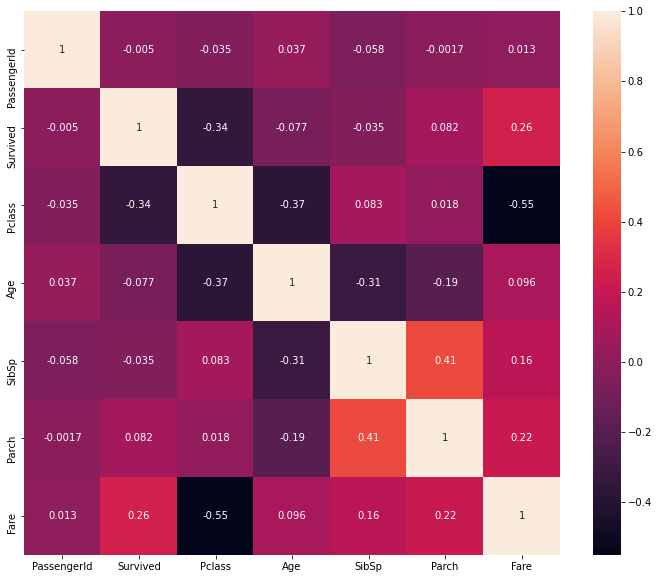

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [17]:
data.Sex=pd.get_dummies(data.Sex)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [18]:
data2 = data

data2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    uint8  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.8 KB


In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X=data2.drop(['Survived', 'Age','Fare'], axis=1)

In [23]:
y=data2["Survived"]

In [52]:
data2.head()
data_r=data.dropna(inplace=True)

In [25]:
X=scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

Import Machine Learning Algoritrhm Model/Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
model=LogisticRegression()

In [31]:
model.fit(X_train,y_train)

LogisticRegression()

In [36]:
prediction=model.predict(X_test)

In [34]:
from sklearn import metrics

In [53]:
print("the accuracy of the model is : ",metrics.accuracy_score(prediction,y_test)*100)


the accuracy of the model is :  79.1044776119403
